# **Project Name**    - Customer Support Analytics – CSAT Prediction & Service Optimization



# **Project Summary -**
This project focuses on analyzing and predicting customer satisfaction using a real-world e-commerce support dataset. The goal is to help the company improve its support quality by identifying key operational factors influencing CSAT (Customer Satisfaction Score) and to build a machine learning model that can predict whether a customer will be satisfied based on their support experience.

The dataset contains structured fields such as issue types, response times, agent details, shifts, tenure buckets, product information, and open-text feedback from customers. The analysis starts with data cleaning by removing duplicates, handling null values, and engineering a response_time_min column to calculate the time taken to respond to customer issues.

Exploratory Data Analysis (EDA) is performed using the UBM (Univariate, Bivariate, Multivariate) method:

Univariate analysis explores the distribution of CSAT scores, agent shifts, sub-categories, and cities.

Bivariate analysis highlights relationships like CSAT vs. agent shift, tenure bucket, and response time.

Multivariate analysis is performed using a heatmap showing how the combination of shift and tenure impacts average CSAT.

A new binary target column CSAT_High is created to classify customer satisfaction into high (1) and low (0). After preparing the data with one-hot encoding for categorical columns, two machine learning models are trained:

Logistic Regression – to understand linear trends and feature importance.

Random Forest Classifier – to capture non-linear relationships and improve accuracy.

Both models are evaluated using accuracy score and classification reports. Random Forest achieved better results in predicting satisfaction. A confusion matrix and a feature importance plot are also visualized to better understand the model’s behavior.

Additionally, NLP techniques are applied on the Customer Remarks field:

A Word Cloud is generated to highlight frequent complaint terms.

Sentiment analysis using TextBlob helps understand the emotional tone of customer feedback.

Key insights show that longer response times reduce satisfaction, certain product categories and sub-categories are more likely to trigger dissatisfaction, and agent performance varies by shift and tenure. The NLP analysis further validates patterns seen in structured data.

In conclusion, this project successfully combines data cleaning, visual analysis, machine learning, and text mining to improve customer service strategy. It not only helps predict customer satisfaction but also uncovers actionable insights to enhance support operations.

# **GitHub Link -**
https://github.com/GayatriKhairnar06/Customer-Support-Analytics

# **Problem Statement**


The aim of this project is to analyze customer support data from an e-commerce system to understand the factors influencing customer satisfaction and service efficiency. By leveraging structured ticket data, agent performance metrics, and customer feedback, the project seeks to identify patterns in customer dissatisfaction and build a predictive model that can forecast customer satisfaction levels (CSAT).

The key challenge lies in detecting operational inefficiencies such as delayed response times, low-performing agent shifts, and common complaint sub-categories that contribute to poor customer experience. In addition, the project explores how natural language processing (NLP) can help extract emotional tone from customer remarks to enhance feedback understanding.

The ultimate goal is to generate actionable insights that support decision-making for team training, resource allocation, and workflow optimization, while also enabling early identification of potential dissatisfaction through predictive analytics.

#### **Business Objective**

The primary business objective of this project is to enhance customer satisfaction and improve operational efficiency in the customer support system of an e-commerce company. This is achieved by:
1.   Identifying key factors that lead to low customer satisfaction (CSAT), such as delayed response times, agent shift performance, and recurring complaint sub-categories.
2.   Building a predictive model to classify whether a customer is likely to be satisfied or dissatisfied based on support interaction features.
3.   Utilizing customer feedback (text remarks) through Natural Language Processing (NLP) to uncover sentiment and frequent complaint themes.
4.   Generating actionable insights for business teams to improve agent training, reduce ticket handling time, optimize staffing, and proactively address common issues.
5.   Providing a data-driven foundation to guide support policies and customer engagement strategies, ultimately leading to higher retention, better reviews, and reduced churn.








# Code

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


## Step 2: Load Dataset

In [2]:
df = pd.read_csv("Customer_support_data.csv")

In [13]:
print(df.columns)

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score', 'response_time_min', 'CSAT_High'],
      dtype='object')


## Step 3: Data Cleaning

In [5]:
# Remove duplicate records
df.drop_duplicates(inplace=True)
# Convert date columns to datetime format
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M')

# Create a response time column in minutes
df['response_time_min'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

# Drop rows with missing CSAT or response time
df.dropna(subset=['CSAT Score', 'response_time_min'], inplace=True)

## Step 4: Exploratory Data Analysis (EDA)

### Chart 1: CSAT Score Distribution (Univariate)

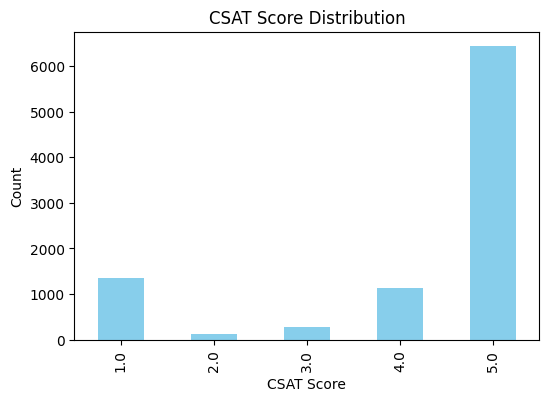

In [6]:
plt.figure(figsize=(6,4))
df['CSAT Score'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("CSAT Score Distribution")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.show()

### Chart 2: Top 10 Sub-categories (Univariate)

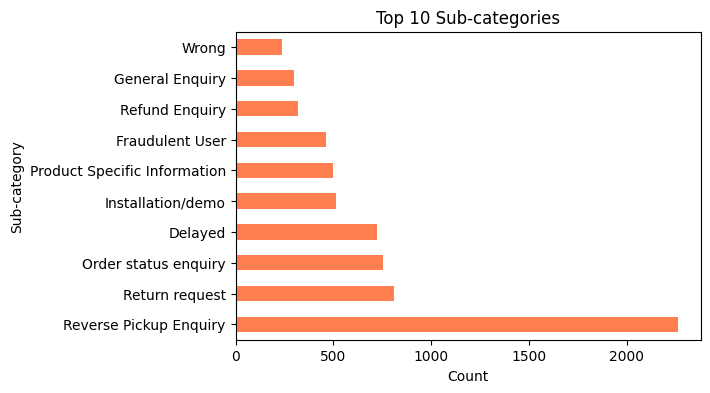

In [7]:
plt.figure(figsize=(6,4))
df['Sub-category'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title("Top 10 Sub-categories")
plt.xlabel("Count")
plt.ylabel("Sub-category")
plt.show()

### Chart 3: Agent Shift Distribution (Univariate)

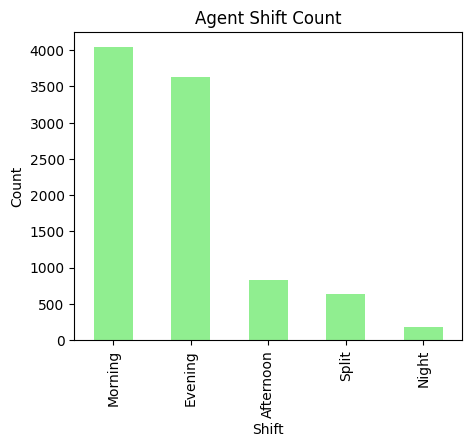

In [8]:
plt.figure(figsize=(5,4))
df['Agent Shift'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Agent Shift Count")
plt.xlabel("Shift")
plt.ylabel("Count")
plt.show()

### Chart 4: Bivariate - CSAT vs Shift

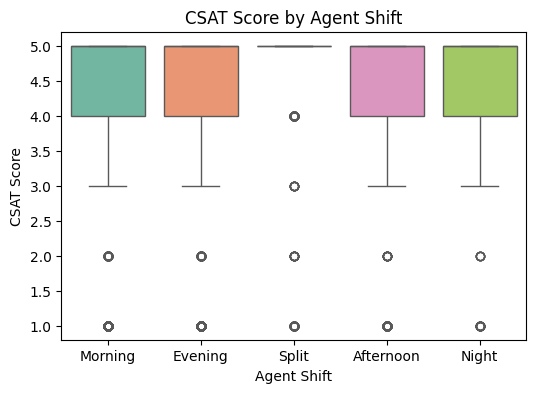

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Agent Shift', y='CSAT Score', data=df, palette='Set2')
plt.title("CSAT Score by Agent Shift")
plt.show()

### Chart 5: Bivariate - CSAT vs Tenure

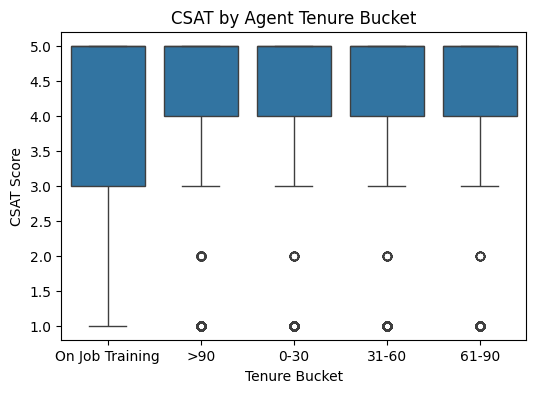

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Tenure Bucket', y='CSAT Score', data=df)
plt.title("CSAT by Agent Tenure Bucket")
plt.show()

### Chart 6: Bivariate - Response Time vs CSAT

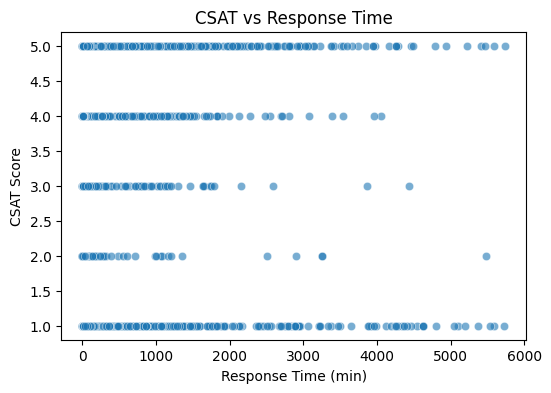

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='response_time_min', y='CSAT Score', data=df, alpha=0.6)
plt.title("CSAT vs Response Time")
plt.xlabel("Response Time (min)")
plt.ylabel("CSAT Score")
plt.show()

### Chart7: Heatmap of Average CSAT by Shift & Tenure

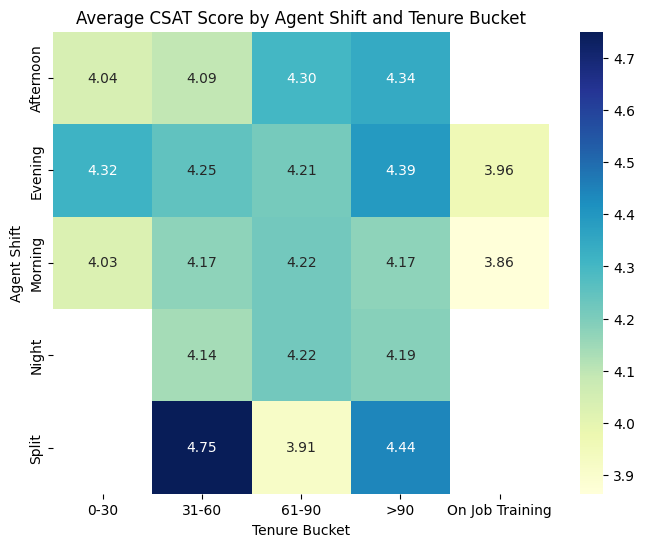

In [32]:
# Pivot table for multivariate analysis
pivot_table = df.pivot_table(
    values='CSAT Score',
    index='Agent Shift',
    columns='Tenure Bucket',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Average CSAT Score by Agent Shift and Tenure Bucket")
plt.xlabel("Tenure Bucket")
plt.ylabel("Agent Shift")
plt.show()


## Step 5: Feature Engineering

In [14]:
# Convert CSAT Score to binary outcome: 1 = High, 0 = Low
df['CSAT_High'] = df['CSAT Score'].apply(lambda x: 1 if x >= 4 else 0)

# Select relevant features
features = ['Sub-category', 'Product_category', 'Item_price', 'Agent Shift', 'Tenure Bucket', 'response_time_min']
df_model = pd.get_dummies(df[features + ['CSAT_High']], drop_first=True)

## Step 6: Train-Test Split

In [15]:
X = df_model.drop('CSAT_High', axis=1)
y = df_model['CSAT_High']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 7: Model 1 - Logistic Regression

In [17]:
# Impute missing values in X_train and X_test with the mean of the respective columns
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("\n[Logistic Regression Results]")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


[Logistic Regression Results]
Accuracy: 0.806745182012848
              precision    recall  f1-score   support

           0       0.36      0.04      0.07       350
           1       0.82      0.98      0.89      1518

    accuracy                           0.81      1868
   macro avg       0.59      0.51      0.48      1868
weighted avg       0.73      0.81      0.74      1868



## Step 8: Model 2 - Random Forest

In [18]:

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("\n[Random Forest Results]")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[Random Forest Results]
Accuracy: 0.7649892933618844
              precision    recall  f1-score   support

           0       0.30      0.19      0.23       350
           1       0.83      0.90      0.86      1518

    accuracy                           0.76      1868
   macro avg       0.56      0.54      0.55      1868
weighted avg       0.73      0.76      0.74      1868



## Step 9: Confusion Matrix for RF

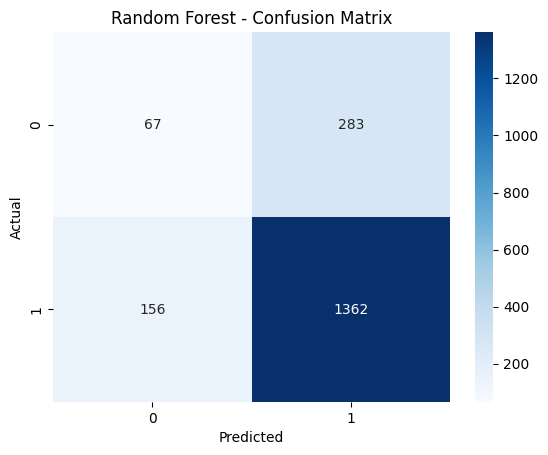

In [19]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 10: Feature Importance Plot

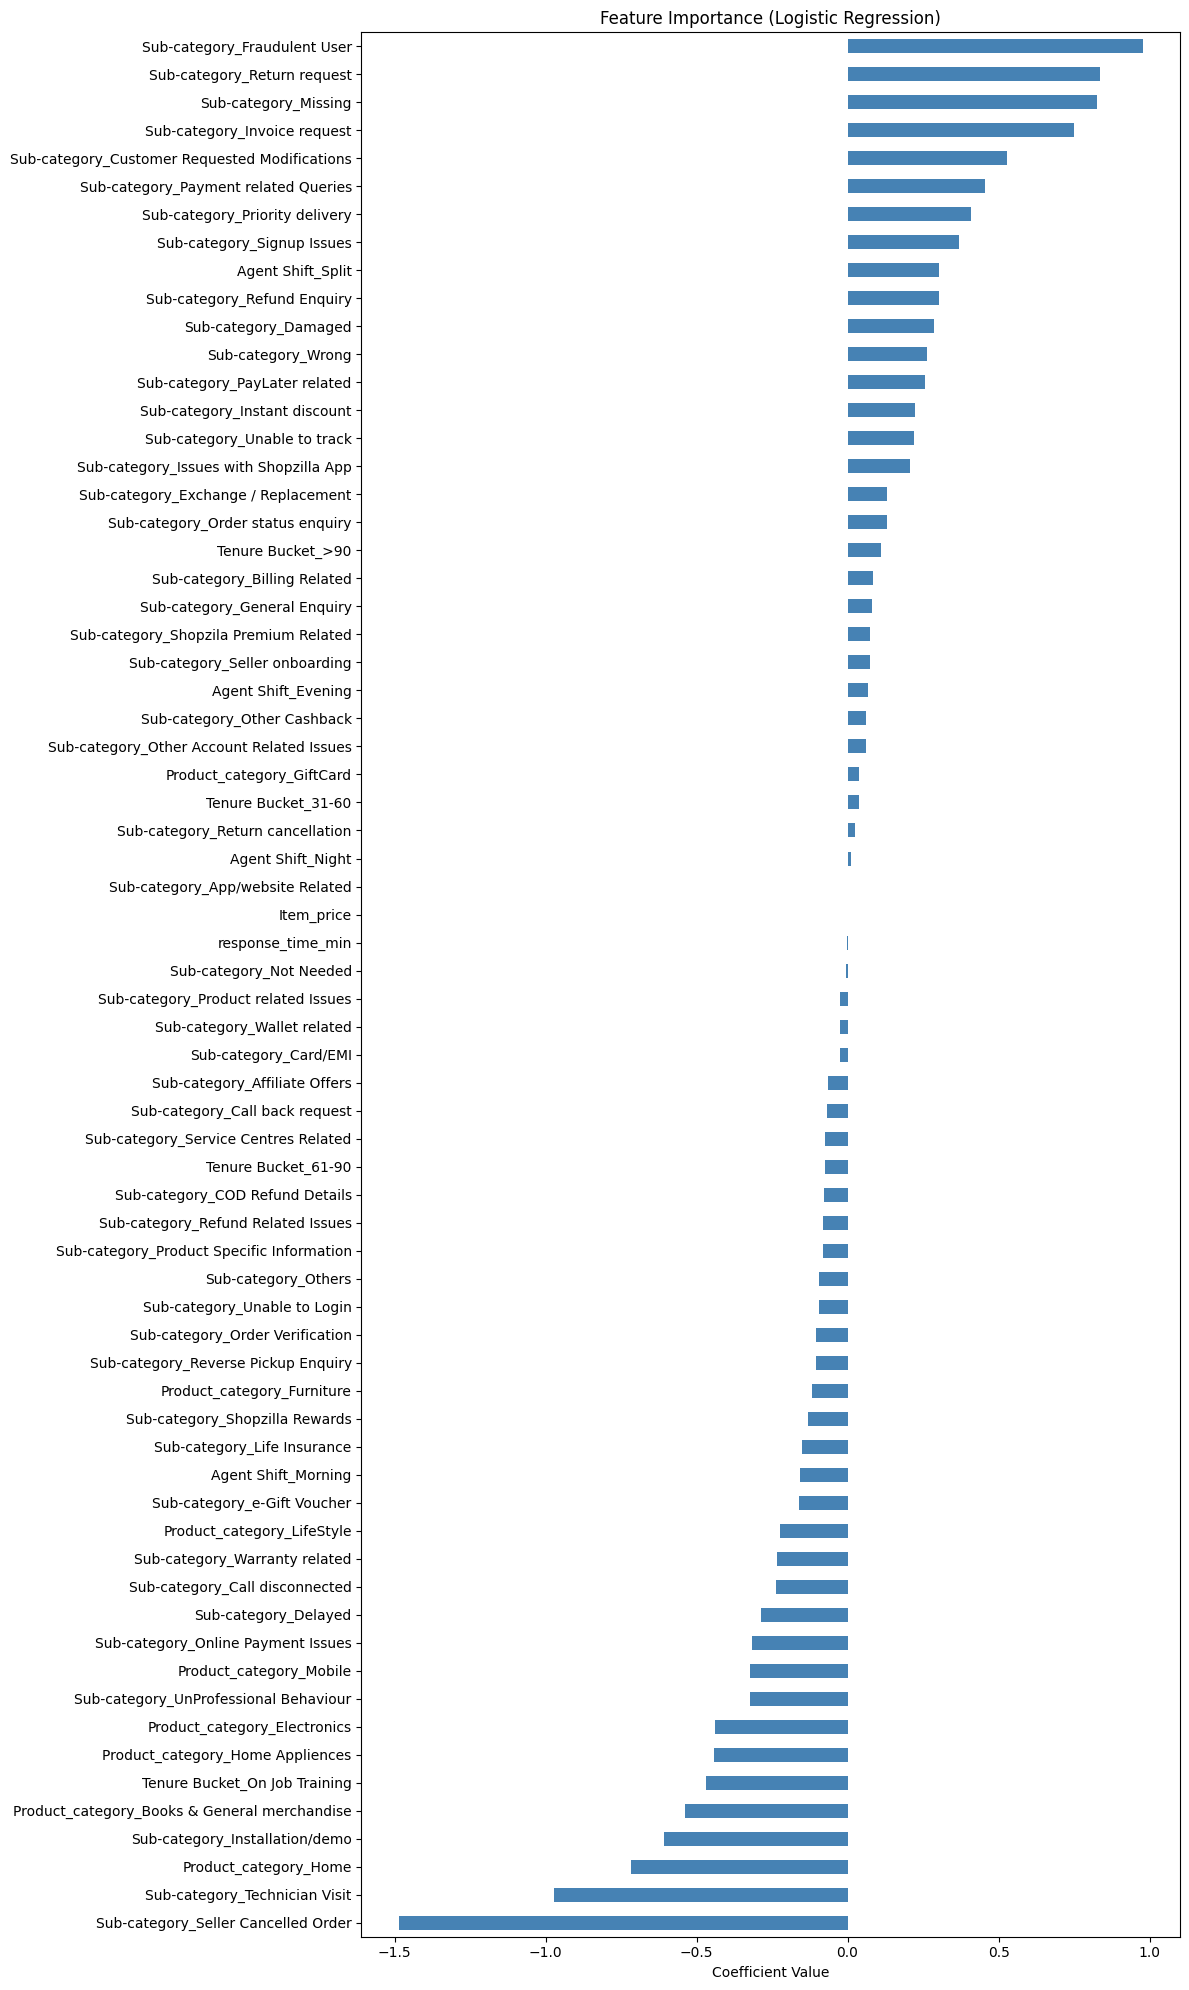

In [20]:
feature_importance = pd.Series(model_lr.coef_[0], index=X.columns)
plt.figure(figsize=(12, 20))
feature_importance.sort_values().plot(kind='barh', color='steelblue')
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

##Step 11: NLP Insights from Customer Remarks

In [22]:
!pip install wordcloud nltk

In [25]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


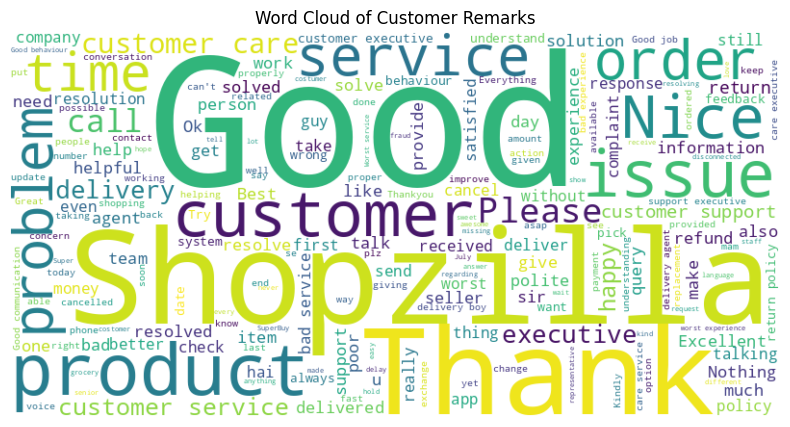

In [26]:
# Generate a Word Cloud for Customer Remarks
text = ' '.join(str(remark) for remark in df['Customer Remarks'] if pd.notnull(remark))
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Customer Remarks")
plt.show()

### Sentiment Analysis

In [28]:
!pip install textblob

In [29]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


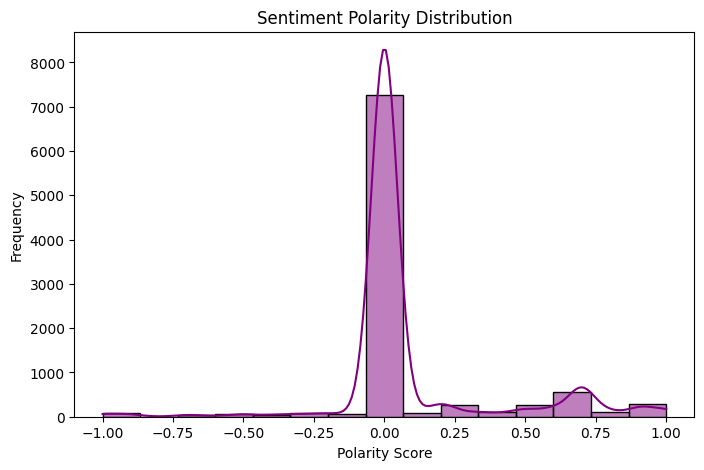

In [30]:

# Calculate sentiment polarity using TextBlob
df['Sentiment_Polarity'] = df['Customer Remarks'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(8,5))
sns.histplot(df['Sentiment_Polarity'], kde=True, color='purple')
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()